In [23]:
import os
#print(os.getcwd())
#print(os.listdir())

for root,dirs,files in os.walk("c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books"):
        print (root)
        print("FILES:")
        for filename in files:
            print (filename)
            print(os.path.join(root, filename))
            print ('-----------------------')
            
            
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books
FILES:
Maliks Muwatta Without_Tashkel.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Maliks Muwatta Without_Tashkel.csv
-----------------------
Maliks Muwatta.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Maliks Muwatta.csv
-----------------------
Musnad Ahmad ibn Hanbal Without_Tashkel.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Musnad Ahmad ibn Hanbal Without_Tashkel.csv
-----------------------
Musnad Ahmad ibn Hanbal.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Musnad Ahmad ibn Hanbal.csv
-----------------------
Sahih Bukhari Without_Tashkel.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Sahih Bukhari Without_Tashkel.csv
-----------------------
Sahih Bukhari.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All Hadith Books\Sahih Bukhari.csv
-----------------------
Sahih Muslim.csv
c:/Users/Aditya Pratap Singh/Desktop/Hadith/All H

In [10]:
import pandas as pd
import numpy as np
import re
import os

import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer

!pip install Tashaphyne
import pyarabic.arabrepr
from tashaphyne.stemming import ArabicLightStemmer

import random
from sklearn.model_selection import train_test_split

In [11]:
stop_words =['من',
 'في',
 'على',
 'و',
 'فى',
 'يا',
 'عن',
 'مع',
 'ان',
 'هو',
 'علي',
 'ما',
 'اللي',
 'كل',
 'بعد',
 'ده',
 'اليوم',
 'أن',
 'يوم',
 'انا',
 'إلى',
 'كان',
 'ايه',
 'اللى',
 'الى',
 'دي',
 'بين',
 'انت',
 'أنا',
 'حتى',
 'لما',
 'فيه',
 'هذا',
 'واحد',
 'احنا',
 'اي',
 'كده',
 'إن',
 'او',
 'أو',
 'عليه',
 'ف',
 'دى',
 'مين',
 'الي',
 'كانت',
 'أمام',
 'زي',
 'يكون',
 'خلال',
 'ع',
 'كنت',
 'هي',
 'فيها',
 'عند',
 'التي',
 'الذي',
 'قال',
 'هذه',
 'قد',
 'انه',
 'ريتويت',
 'بعض',
 'أول',
 'ايه',
 'الان',
 'أي',
 'منذ',
 'عليها',
 'له',
 'ال',
 'تم',
 'ب',
 'دة',
 'عليك',
 'اى',
 'كلها',
 'اللتى',
 'هى',
 'دا',
 'انك',
 'وهو',
 'ومن',
 'منك',
 'نحن',
 'زى',
 'أنت',
 'انهم',
 'معانا',
 'حتي',
 'وانا',
 'عنه',
 'إلي',
 'ونحن',
 'وانت',
 'منكم',
 'وان',
 'معاهم',
 'معايا',
 'وأنا',
 'عنها',
 'إنه',
 'اني',
 'معك',
 'اننا',
 'فيهم',
 'د',
 'انتا',
 'عنك',
 'وهى',
 'معا',
 'آن',
 'انتي',
 'وأنت',
 'وإن',
 'ومع',
 'وعن',
 'معاكم',
 'معاكو',
 'معاها',
 'وعليه',
 'وانتم',
 'وانتي',
 '¿',
 '|']

In [12]:
   
def normalize(sentence):
    '''
    Input Arguments:
        string of words
    return:
        string of words in standardize form
    '''
    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    return sentence

In [13]:
def removing_ar_stopwords(text):
    """
        Removes Stop Words
        
    """

    original_words = []
    words = word_tokenize(text) # works on one string not list
    for word in words:
        if word not in stop_words:
            original_words.append(word)
    filtered_sentence = " ".join(original_words)
    return filtered_sentence

In [14]:
def clearReg(text):
    """
        This function for getting the normal values of out of lemmatization function
        that takse a string of dict as a 
        takes  : '{"result":["امر","ب","أخذ","ما","نهى","ه","انتهى"]}'
        return : ['امر أخذ ما نهى انتهى']
    """
    each_lemma_word = []
    each_lemma_sentence = []
    for hadith in text:
        matches = re.findall(r'\"(.+?)\"',hadith)
        for word in matches:
            if len(word) >= 2 and word !='result':
                each_lemma_word.append(word)
        each_lemma_sentence.append(" ".join(each_lemma_word))
        each_lemma_word.clear()
    return each_lemma_sentence

In [15]:
def stemming_1(text):
    """
        1st Stemming function - NLTK by ISRIStemmer.
    """
    st = ISRIStemmer()
    stemmend_words = []
    words = word_tokenize(text)
    for word in words:
        stemmend_words.append(st.stem(word))
    stemmed_sentence = " ".join(stemmend_words)
    return stemmed_sentence
        
    
    
def stemming_2(text):
    """
        2nd Stemming Function with built in library called Tashaphyne.
        The documentation ==> https://pypi.org/project/Tashaphyne/
    
    """
    import pyarabic.arabrepr
    arepr = pyarabic.arabrepr.ArabicRepr()
    repr = arepr.repr

    from tashaphyne.stemming import ArabicLightStemmer
    ArListem = ArabicLightStemmer()

    hadiths_without_stop_words_and_with_normalization_and_with_stemming = []

    for hadith in hadiths_without_stop_words_and_with_normalization:
        words = word_tokenize(hadith)
        new_list = []
        for word in words:
            stem = ArListem.light_stem(word)
            stem = ArListem.get_stem()
            new_list.append(stem)

        hadith_sentence_with_stemming = " ".join(new_list)
        hadiths_without_stop_words_and_with_normalization_and_with_stemming.append(hadith_sentence_with_stemming)
        
    return hadiths_without_stop_words_and_with_normalization_and_with_stemming

In [16]:
def lemmatization(text):
    """
        1st Lemmatizing Function using Farasa API, and it should get best result of all the previous functions
        return a string from the dictionary corpus '{"result":["امر","ب","أخذ","ما","نهى","ه","انتهى"]}'
    """
    import http.client
    conn = http.client.HTTPSConnection("farasa-api.qcri.org")
    hadith_dict = {}
    list_pyload_input = []
    list_pyload_out = []
    length = len(text)
    for h in text[:length]:
        q = '{"text":'+'"{}"'.format(h)+'}'
        list_pyload_input.append(q)
    headers = { 'content-type': "application/json", 'cache-control': "no-cache", }
    for h in list_pyload_input:
        conn.request("POST", "/msa/webapi/lemma", h.encode('utf-8'), headers)
        res = conn.getresponse()
        data = res.read()
        list_pyload_out.append(data.decode("utf-8"))
        final_result = clearReg(list_pyload_out)     # call clearReg for clean the text
    return final_result

1. Stemming : Algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. May or May not have a meaning.
2. Lemmatization : Algorithm takes into consideration the morphological analysis of the words using a Word Corpus.
Lemmatization is typically seen as much more informative than simple stemming, because lemmatized word always holds meaning.

Used Functions:

1.stemming_1 by ISRIStemmer from NLTK.

2.stemming_2 by Tashaphyne is an Arabic light stemmer(removing prefixes and suffixes) and gives all possible segmentations.

3.lemmatization by Farasa API

Lemmatization by Farasa should give us consistently better results.

In [17]:
data_1 = pd.read_csv(os.path.join(root, 'Sahih_Buk.csv'))
data_1.head()

,Sahih Bukhari Without_Tashkel
0,حدثنا الحميدي عبد الله بن الزبير قال حدثنا سفي...
1,حدثنا عبد الله بن يوسف قال أخبرنا مالك عن هشام...
2,حدثنا يحيى بن بكير قال حدثنا الليث عن عقيل عن ...
3,حدثنا موسى بن إسماعيل قال حدثنا أبو عوانة قال ...
4,حدثنا عبدان قال أخبرنا عبد الله قال أخبرنا يون...


In [18]:
all_hadiths_1 = []

for hadith in data_1['Sahih Bukhari Without_Tashkel']:
    all_hadiths_1.append(hadith)


In [19]:
#%%time

# Sahih_Bukhari
cleared_Hadith_1 = []           # Removing stopwords
cleared_Hadith_1_2 = []         # Normalization
cleared_Hadith_1_2_3 = []       # Lematization

for hadith in all_hadiths_1:
    cleared_Hadith_1.append(removing_ar_stopwords(hadith))         # Removing stopwords
for hadith in cleared_Hadith_1:
    cleared_Hadith_1_2.append(normalize(hadith))                   # Normalization
cleared_Hadith_1_2_3 = lemmatization(cleared_Hadith_1_2)           # Lematization

print('The size of data:')
len(cleared_Hadith_1), len(cleared_Hadith_1_2), len(cleared_Hadith_1_2_3)

The size of data:


(99, 99, 99)

In [20]:
cleared_Hadith_1_2_3[:1]

['حدث حميدي عبد الله ابن زبير حدث سفيان حدث أحيى ابن سعيد انصاري اخبرني محمد ابن ابراهيم تيمي ان سمع علقم ابن قاص ليث قال سمع عمر ابن خطاب رضي الله منبر سمع رسول الله صلي الله سلم قال انما اعمال نية انما كل امرء نوي من هجرة دنيا أصاب امرا نكح هجرة هاجر الي']

In [22]:
Sahih_Buk_preprosessing_1 = pd.DataFrame(cleared_Hadith_1_2_3, columns=['Sahih_Buk_Preprosessing_Cleaned'])
Sahih_Buk_preprosessing_1.head()
path_dir='c:/Users/Aditya Pratap Singh/Desktop/Hadith/Preprocessed_Save'
if not os.path.exists(path_dir):
    os.mkdir(path_dir)

Sahih_Buk_preprosessing_1.to_csv(os.path.join(path1,'Preprocessed_SABtrial.csv'), encoding='utf-8')

In [14]:
!pip install arabic-reshaper
!pip install python-bidi
!pip install wordcloud
import pandas as pd
import numpy as np
import re
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pprint
from wordcloud import WordCloud , ImageColorGenerator
import arabic_reshaper
from nltk.probability import FreqDist
from bidi.algorithm import get_display
from IPython.display import Image
from PIL import Image 
plt.figure(figsize=(8,8));

<Figure size 576x576 with 0 Axes>

In [15]:
all_hadith = Sahih_Buk_preprosessing_1.values.tolist()

In [16]:
#print(all_hadith)
#for i in range(2,5):
print(all_hadith[0])

   # print('-'*50)

['حدث حميدي عبد الله ابن زبير حدث سفيان حدث أحيى ابن سعيد انصاري اخبرني محمد ابن ابراهيم تيمي ان سمع علقم ابن قاص ليث قال سمع عمر ابن خطاب رضي الله منبر سمع رسول الله صلي الله سلم قال انما اعمال نية انما كل امرء نوي من هجرة دنيا أصاب امرا نكح هجرة هاجر الي']


In [17]:
for i in range(0,5):
    print(all_hadith[i])
    print('-'*50)

['حدث حميدي عبد الله ابن زبير حدث سفيان حدث أحيى ابن سعيد انصاري اخبرني محمد ابن ابراهيم تيمي ان سمع علقم ابن قاص ليث قال سمع عمر ابن خطاب رضي الله منبر سمع رسول الله صلي الله سلم قال انما اعمال نية انما كل امرء نوي من هجرة دنيا أصاب امرا نكح هجرة هاجر الي']
--------------------------------------------------
['حدث عبد الله ابن يوسف اخبر مالك هشام ابن عرو ابيه عاءش ام مءمن رضي الله حارث ابن هشام رضي الله سال رسول الله صلي الله سلم قال رسول الله كيف ياتيك وحي قال رسول الله صلي الله سلم احيا ياتيني مثل صلصل جرس اشد فيفصم عن قد وعي احيا تمثل ملك رجل فيكلمني اعي قال قال عاءش رضي الله قد راية نزل وحي شديد برد فيفصم جبين يتفصد عرق']
--------------------------------------------------
['حدث أحيى ابن بكير حدث ليث عقيل ابن شهاب عرو ابن زبير عاءش ام مءمن انها قال بدء رسول الله صلي الله سلم وحي رءيا صالح نوم كان لا يري رءي الا جاء مثل فلق صبح ثم حبب الي خلاء كان خلا غار حراء فيتحنث تعبد ليلة ذوات عدد قبل نزع اهل يتزود ذلك ثم رجع خديج فيتزود مثل جاء حق غار حراء جاء ملك قال اقر قارء فاخذني فغطني بلغ 

In [18]:
all_hadith_split_words = []
l=0
for one_h in all_hadith:
    each_h=''.join(one_h)
    for each_w in each_h.split():
        all_hadith_split_words.append(each_w)
    each_h=''
        
temp = collections.Counter(all_hadith_split_words)
collections_of_word = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))
print(f'There are {len(collections_of_word)} unique word.')

There are 1379 unique word.


In [21]:
list(collections_of_word.items())[:10]

[('الله', 457),
 ('ابن', 336),
 ('حدث', 226),
 ('قال', 203),
 ('سلم', 155),
 ('صلي', 152),
 ('عبد', 118),
 ('رسول', 111),
 ('لا', 89),
 ('ابي', 89)]

In [22]:
splitting_words= ['عن' , 'حدثنا', 'سمعت']

1 0


C:\Users\Public\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


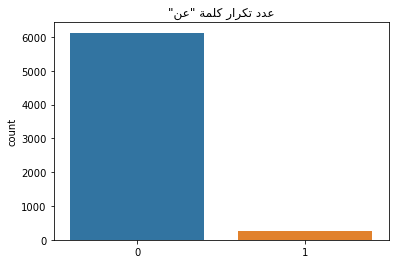

In [23]:
count = []
wordcount = 0
my_word="عن"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in str(all_hadith[i]).split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "عن"'))
plt.title(Ar_title);  

0 0


C:\Users\Public\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


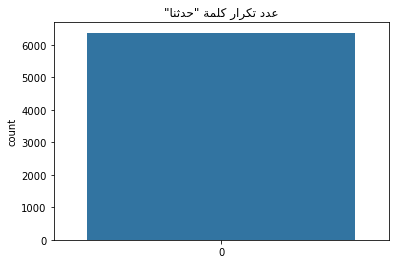

In [30]:
count = []
wordcount = 0
my_word="حدثنا"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in str(all_hadith[i]).split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "حدثنا"'))
plt.title(Ar_title);

0 0


C:\Users\Public\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


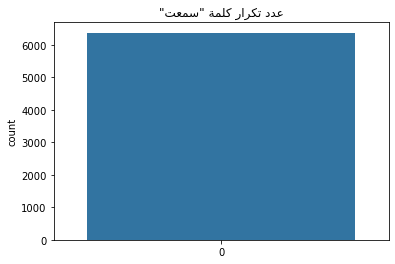

In [31]:
count = []
wordcount = 0
my_word="سمعت"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in str(all_hadith[i]).split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "سمعت"'))
plt.title(Ar_title);


In [26]:
count = []
my_word_1="عن"
my_word_2="حدثنا"
my_word_3="سمعت"
for i in range(len(all_hadith)):
    wordcount_1, wordcount_2, wordcount_3 = 0, 0 ,0, 
    for word in str(all_hadith[i]).split():
        if(my_word_1 == word):
            wordcount_1 +=1
        elif(my_word_2 == word):
            wordcount_2 +=1
        elif(my_word_3 == word):
            wordcount_3 +=1
    count.append({"Hadith_num": i, "An": wordcount_1, "Hadathna": wordcount_2, "Samaat": wordcount_3}) 
count[:10] # ['عن , حدثنا , سمعنا']

[{'Hadith_num': 0, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 1, 'An': 1, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 2, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 3, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 4, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 5, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 6, 'An': 1, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 7, 'An': 0, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 8, 'An': 1, 'Hadathna': 0, 'Samaat': 0},
 {'Hadith_num': 9, 'An': 0, 'Hadathna': 0, 'Samaat': 0}]

In [27]:
def normalize(sentence):
    """
        replace all  صلي or النبي with صلى or النبى
    """
    sentence = re.sub("صلي", "صلى", sentence)
    sentence = re.sub("النبي", "النبى", sentence)
    return sentence

test_st = "قال رسول الله صلي الله عليه وسلم ، قال النبي صلى الله عليه وسلم"
print(test_st)
print(normalize(test_st))

قال رسول الله صلي الله عليه وسلم ، قال النبي صلى الله عليه وسلم
قال رسول الله صلى الله عليه وسلم ، قال النبى صلى الله عليه وسلم


In [28]:
all_hadith_with_normalization = []
for hadith in str(all_hadith[i]):
    all_hadith_with_normalization.append(normalize(hadith)) 

In [29]:
all_hadith_split_words_normalized = []
for each_h in all_hadith_with_normalization:
    for each_w in each_h.split():
        all_hadith_split_words_normalized.append(each_w)
        
temp = collections.Counter(all_hadith_split_words_normalized)
collections_of_word_normalized = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))

print("\t***The Same Length Here***\t")
print(f"all summation of صلى is = {collections_of_word_normalized['صلى'] }")
print(f"all summation of النبى is = {collections_of_word_normalized['النبى'] }")

	***The Same Length Here***	


KeyError: 'صلى'